<a href="https://colab.research.google.com/github/hima9/TimeSeries/blob/master/MovingAvg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def parse(x):
  return datetime.strptime(x,'%m/%d/%Y')

In [3]:
df=pd.read_csv('/content/electricity_consumption.csv',parse_dates=['Bill_Date'],date_parser=parse)
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [4]:
print("Rows:",df.shape[0])
print("Columns:",df.shape[1])
print("Features:",df.columns.tolist())
print("Missing values:\n",df.isnull().any())
print("Unique values:\n",df.nunique())

Rows: 53
Columns: 6
Features: ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']
Missing values:
 Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool
Unique values:
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [5]:
bill_df=df.set_index("Bill_Date")

In [6]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [7]:
bill_2018=bill_df['2016':'2018'][['Billed_amount']]

In [8]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


Moving Average=(t+(t-1)+(t-2)+..+(t-n))/n

In [9]:
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [10]:
bill_2018['ma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)

In [11]:
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


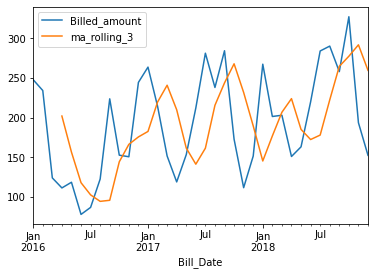

In [12]:
bill_2018.plot();

moving average is not a great choice when we have non stationary data because of the fluctuating points.